In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_json('./Microsoft-Academic/layer0_paper.json')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5125 entries, 0 to 5124
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AA           5125 non-null   object 
 1   E            5125 non-null   object 
 2   D            5125 non-null   object 
 3   F            5124 non-null   object 
 4   CC           5125 non-null   int64  
 5   kesEntityId  5125 non-null   int64  
 6   W            5125 non-null   object 
 7   Ti           5125 non-null   object 
 8   RId          4546 non-null   object 
 9   logprob      5125 non-null   float64
 10  Id           5125 non-null   int64  
 11  J            379 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 480.6+ KB
None


In [7]:
partial_df = df[['Id', 'Ti', 'D']].set_index('Id')
partial_df.rename(columns={'Ti': 'paper title', 'D': 'publish years'}, inplace=True)

In [8]:
def stringify_authors(row):
    authors_list = [author['AuN'] for author in row['authors']]
    row['authors'] = ';'.join(authors_list)
    return row

authors_df = pd.DataFrame(df['AA'].values.copy(), index=df['Id'], columns=['authors'])
authors_df.apply(stringify_authors, axis=1)
print(authors_df)

                                                      authors
Id                                                           
2173520492            alec radford;luke metz;soumith chintala
2131241448          jasper snoek;hugo larochelle;ryan p adams
2119144962  song han;huizi mao;william j dally;william j d...
2176412452  djorkarne clevert;thomas unterthiner;sepp hoch...
2286929393                           fisher yu;vladlen koltun
...                                                       ...
2772236815             chihyuan yang;sifei liu;minghsuan yang
2617634260  yao qin;mengyang feng;huchuan lu;garrison w co...
2785057145  loris belcastro;fabrizio marozzo;domenico tali...
2024357166       stephen j mckenna;jesse hoey;emanuele trucco
2152915516                                    christina unger

[5125 rows x 1 columns]


In [9]:
out_df = partial_df.join(authors_df)
out_df.index.name = 'paperID'
print(out_df)

                                                  paper title publish years  \
paperID                                                                       
628035                  mixed membership matrix factorization    2010-01-01   
665341      topic correlation analysis for cross domain te...    2012-07-22   
1407234                                 multi class leveraged    2010-01-01   
1788602     semantic relatedness using salient semantic an...    2011-08-07   
2581345     intrinsic image decomposition using structure ...    2014-09-06   
...                                                       ...           ...   
2885394260  distributed clustering via lsh based data part...    2018-07-03   
2886144305  batch is not heavy learning word representatio...    2018-01-01   
2887299397                               veracity of big data    2015-10-19   
2887432412        recognizing quantity names for tabular data    2018-01-01   
2887439430  draco byzantine resilient distributed tr

In [10]:
out_df.to_csv('out_microsoft.csv')

In [11]:
total_author_list = [author_str.split(';') for author_str in authors_df['authors'].values]
individual_authors = [author for author_list in total_author_list for author in author_list]

individual_authors_df = pd.DataFrame(1, index=individual_authors, columns=['publications'])
individual_authors_df.index.name = 'author'

In [12]:
top_ten_authors = individual_authors_df.groupby('author').count().reset_index().sort_values(
    by='publications', ascending=False).head(10)
print(top_ten_authors)

                 author  publications
6211     minghsuan yang            53
10268     yoshua bengio            44
5404       luc van gool            33
9055     trevor darrell            32
9655      xiaogang wang            32
566    andrew zisserman            27
9698        xiaoou tang            26
4313     jitendra malik            25
4173         jiawei han            24
1026      bernt schiele            24


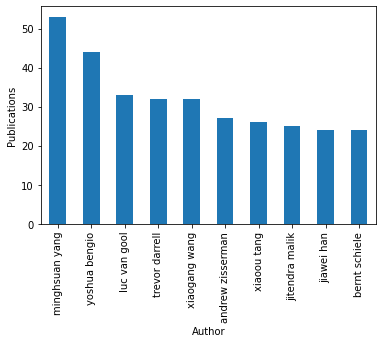

In [13]:
top_ten_authors.plot.bar(x='author', y='publications', rot=90, legend=False)

plt.xlabel('Author')
plt.ylabel('Publications')
plt.show()